coefficients of w =  [-0.20442498  0.80638479]
weight_L2_norm = 0.832 
training (fitting) / test error = 0.533 / 0.506 


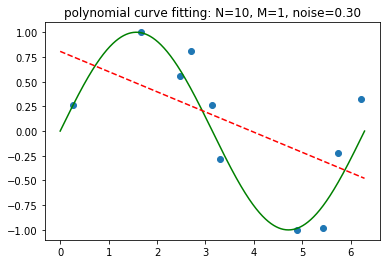

In [135]:
# polynomial_fitting
#
import numpy as np
import random
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error

N = 10 # number of sample data
M =  1 # dimension of fitting 
noise_power=0.3 # noise strength

random.seed(0)
x = np.linspace(0, 2*np.pi, 1000) # data in [0-2pi]
y = np.sin(x)

# sample generation  ##### training data:  (sx, t) #####
#sx = np.random.rand(N)*2*np.pi #generate N sample data in [0-2pi]
sx=random.sample(list(x),N) # N sample from x (same meaning as above)
sx=np.sort(sx)
noise = np.random.randn(N) # N(0,1) noise
t = np.sin(sx+noise_power*noise) # observed data

#estimation of w and function
w=np.polyfit(sx, t, M) #estimation of w
polyfunc=np.poly1d(w)
y_est=polyfunc(x) #estimated function

#draw figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.ylim(-1.1,1.1)
ax.plot(x,y,color='green')
ax.scatter(sx,t)
ax.plot(x,y_est,color='red', linestyle='dashed')


#calculate RMSE (root mean square error)
sy_est=polyfunc(sx) #estimated y on observation
rmse_train=np.sqrt(mean_squared_error(sy_est, t))
rmse_test=np.sqrt(mean_squared_error(y_est,y))
weight_norm=np.sqrt(np.sum(np.abs(w**2))) #calculated L2
ax.set_title('polynomial curve fitting: N={:d}, M={:d}, noise={:.2f}'.format(N,M,noise_power))

# output results
print("coefficients of w = ",w) #w_M, w_M-1, w_M-2,...,w_0
print("weight_L2_norm = {:.3f} ".format(weight_norm))
print("training (fitting) / test error = {:.3f} / {:.3f} ".format(rmse_train, rmse_test))
#Strictly speaking, learning data points need to be excluded from rmse_test

